# Small Samples and $t$-Tests

What do we do when the overall sample size for the $t$-test is $n < 40$?

The process is the same as are the formulas, but we take a different approach to verifying the assumptions. For small sample sizes, we don't have enough data points for the **density plots** and **QQ plots** to work properly. Thus, <b><span style="color: purple">our normality check works like this:</span></b>

1. Stem Plot -- need evidence the sample was drawn from a bell-shaped distribution.
2. Box Plot -- need to find zero outliers, as outliers are extremely influential in small samples.

For the <b><span style="color: purple">homogeneity of the variances</span></b> check, we still require the ratio of sample sizes to be no larger than $2 : 1$.

## Example: Independent Samples $t$-Test

Adding bran to the diet can help patients with diverticulosis. The researchers wish to test two different preparations on patients. The transit time through the alimentary canal is tested for both groups. Which bran-based treatment works better? The data is shown below:

<table style="width:80%">
  <tr>
    <th>Treat 1</th>
    <td>44</td><td>51</td><td>52</td><td>55</td><td>60</td><td>62</td><td>66</td><td>68</td><td>69</td><td>71</td><td>71</td><td>76</td><td>82</td><td>91</td><td>97</td>
  </tr>
  <tr>
    <th>Treat 2</th>
    <td>52</td><td>64</td><td>68</td><td>74</td><td>79</td><td>83</td><td>84</td><td>88</td><td>95</td><td>97</td><td>101</td><td>116</td>
  </tr>
</table>

</body>

We need to generate numeric vectors for these data:

In [1]:
one <- c(44, 51, 52, 55, 60, 62, 66, 68, 69, 71, 71, 76, 82, 91, 97)
two <- c(52, 64, 68, 74, 79, 83, 84, 88, 95, 97, 101, 116)

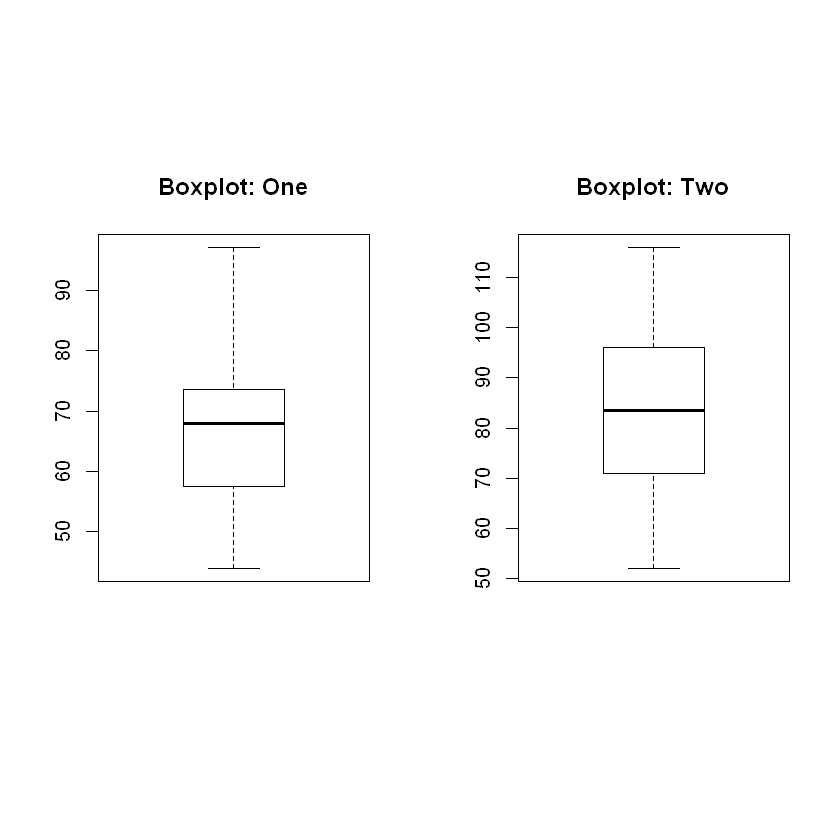

In [2]:
layout(matrix(c(1,2), ncol = 2), height = lcm(12))
boxplot(one, main = 'Boxplot: One')
boxplot(two, main = 'Boxplot: Two')

In [3]:
cat('Stem Plot: One')
stem(one, scale = 2)
cat('Stem Plot: Two')
stem(two, scale = 2)

Stem Plot: One


  The decimal point is 1 digit(s) to the right of the |

  4 | 4
  5 | 125
  6 | 02689
  7 | 116
  8 | 2
  9 | 17



Stem Plot: Two


  The decimal point is 1 digit(s) to the right of the |

   5 | 2
   6 | 48
   7 | 49
   8 | 348
   9 | 57
  10 | 1
  11 | 6



**Analysis of Normality Assumption**

The stem plots both show reasonable evidence of the samples being drawn from normal (bell-shaped) distributions. The box plots show that neither sample has any outliers. Thus, <b><span style="color: purple">the data are appropriate for $t$ procedures.</span></b>

**Analysis of Homogeneity Assumption**

The samples sizes are $n_1 = 15$ and $n_2 = 12$, so the ratio of sample sizes is $15 : 12$ which reduces to $5:4$. Since this is clearly far less than $2:1$, we have few worries when conducting $t$ procedures.

### Descriptives

We need to know the means, standard deviations and sample sizes for both groups. We can perform all needed calculations inside the **cat()** function as shown below.

In [4]:
cat('Descriptive Statistics for Treatment 1:\n  Mean = ', mean(one), '\n  Std Dev = ', sd(one), '\n  Sample Size = ', length(one))
cat('\nDescriptive Statistics for Treatment 2:\n  Mean = ', mean(two), '\n  Std Dev = ', sd(two), '\n  Sample Size = ', length(two))

Descriptive Statistics for Treatment 1:
  Mean =  67.66667 
  Std Dev =  14.739 
  Sample Size =  15


Descriptive Statistics for Treatment 2:
  Mean =  83.41667 
  Std Dev =  17.63498 
  Sample Size =  12

### Hypothesis

For the independent samples $t$-test, we have the following hypotheses:

$$\begin{align}H_0 &: \mu_1 = \mu_2\\H_a &: \mu_1 \neq \mu_2 \end{align}$$

where $\mu_1$ is the sample average improvement due to treatment 1 and $\mu_2$ is the sample average improvement due to treatment 2.

### Cutoff Value

With $df = min(n_1 -1, n_2 -1)=11$, we can look up $t^*$ in the $t$-table in the 2-tailed column using the $\alpha = 0.05$ level of significance. Hence, we see that

$$t^* = 2.201$$

### Test Stastic

To calcuate $t$, the formula sheet gives the following:

$$\begin{align}t &= \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}\\&= \frac{67.7-83.4}{\sqrt{\frac{14.7^2}{15} + \frac{17.6^2}{12}}}\\&= \frac{-15.7}{\sqrt{\frac{216.1}{15} + \frac{309.8}{12}}}\\&= \frac{-15.7}{\sqrt{14.4 + 25.8}}\\&= \frac{-15.7}{6.3} \implies\\t &\approx 2.5\\\end{align}$$

### Reporting Out

Since $|t| = 2.5 > 2.201 = t^*$, we reject the null. Thus, we have evidence for a differential effectiveness between the two treatments. Based up the means listed above in the descriptives, we see that the evidence points to a significant difference in favor of treatment 2.

## Example 2: Matched Pairs

A chemistry department has developed a new lab sequence that they feel will better prepare students to do well in a first college chemistry course. Before deploying the new labs on a large scale, they work with one small class of students who do the new labs. The students are given a diagnostic quiz in a pretest vs. posttest format. The scores are shown below. Test at the $\alpha = 0.05$ level whether the students improved in their knowledge of chemistry while using this new format.

<table style="width:80%">
<tr>
  <th>Pre</th><td>18</td><td>21</td><td>16</td><td>22</td><td>19</td><td>24</td><td>17</td><td>21</td><td>23</td><td>18</td><td>14</td><td>16</td><td>16</td><td>19</td><td>18</td><td>20</td><td>12</td><td>22</td><td>15</td><td>17</td>
</tr><tr>
<th>Post</th><td>22</td><td>25</td><td>17</td><td>24</td><td>16</td><td>29</td><td>20</td><td>23</td><td>19</td><td>20</td><td>15</td><td>15</td><td>18</td><td>26</td><td>18</td><td>24</td><td>18</td><td>25</td><td>19</td><td>16</td>
</tr>
</table>

Again, we need to generate numeric vectors for the pretest and posttest data along with gain scores.

In [5]:
pre <- c(18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12, 22, 15, 17)
post <- c(22, 25, 17, 24, 16, 29, 20, 23, 19, 20, 15, 15, 18, 26, 18, 24, 18, 25, 19, 16)
gain <- post - pre
head(gain, 5)

[1]  4  4  1  2 -3

### Descriptives

We work with the single sample of **gain scores** for this test.

In [6]:
cat('Descriptives: Chemistry gain scores\n  Mean = ', mean(gain), '\n  Std. Dev = ', sd(gain), '\n  Sample Size = ', length(gain))

Descriptives: Chemistry gain scores
  Mean =  2.05 
  Std. Dev =  2.837252 
  Sample Size =  20

### Normality and Homegeneity Assumptions

For normality in this small sample, we inspect the stem plot and the box plot.

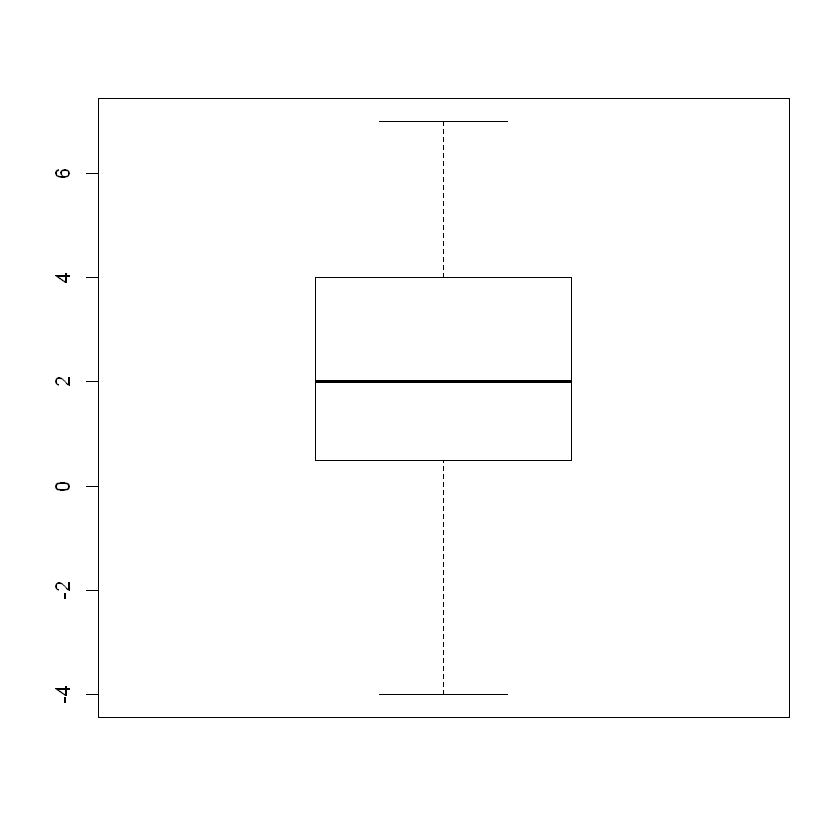

In [7]:
boxplot(gain)

In [8]:
stem(gain, scale = 2)


  The decimal point is at the |

  -4 | 0
  -2 | 0
  -0 | 00
   0 | 000
   2 | 000000
   4 | 00000
   6 | 00



**Analysis.** While we see some skew to left in the stem plot, we still have good evidence for the data being drawn from an approximately normal distribution. Also, we have no outliers, and thus the **normality assumption passes verification.**

There is little we can do to check the homogeneity of the variances for a single sample test other than to note that a sample size of more than 100 is more than adequate for this test. Hence, **these data are appropriate for $t$ procedures.**

### Hypotheses

$$\begin{align}H_0 &: \mu_g = 0\\H_a &: \mu_g > 0\end{align}$$

### Conducting the Test with Formulas and Tables

In this small sample case, let's do the work "by-hand" after reminding ourselves of the descriptives.

In [9]:
cat('Descriptives: Chemistry gain scores\n  Mean = ', mean(gain), '\n  Std. Dev = ', sd(gain), '\n  Sample Size = ', length(gain))

Descriptives: Chemistry gain scores
  Mean =  2.05 
  Std. Dev =  2.837252 
  Sample Size =  20

Notice that, from the formula sheet, we have:

$$t = \frac{\bar x - \mu_0}{\frac{s}{\sqrt{n}}}$$

where $\mu_0 = 0$. Thus, we start with the following:

$$\begin{align}t &= \frac{\bar x}{\frac{s}{\sqrt{n}}}\\
   &= \frac{2.05}{\frac{2.84}{\sqrt{20}}}\\
   &= \frac{2.05}{0.635} \implies\\
   t &\approx 3.23\end{align}$$

### Cutoff Value $t^*$

In the $t$ table, we use the $\alpha = 0.05$ column in the 1-tailed test section with $df = n-1 = 19$. We find that

$$t^* = 1.729$$

### Reporting Out

Given that $|t| = 3.23 > 1.73 = t^*$, we reject the null. We have evidence for the alternative which indicates that these students, on average, improved their knowledge of basic chemistry during this course.

## Modern Methods

We can quickly compute the $t$-test in R to verify the results.

In [10]:
t.test(gain)


	One Sample t-test

data:  gain
t = 3.2313, df = 19, p-value = 0.004395
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7221251 3.3778749
sample estimates:
mean of x 
     2.05 


The $t$ statistic we calculated was

$$t = 3.23$$

which matches the R calculation rounded to the hudredth place. Hence, we confirm the above analysis aligns with the same test conducted in R.